# Simple Linear Regression

## Learning Activities

- learn to use scikit-learn to implement simple linear regression  
- learn to create, train, and test a linear regression model on real data  

## Import needed packages
For this lab, you will need to have the following packages:

- NumPy  
- Matplotlib  
- Pandas  
- Scikit-learn  

Execute the below to ensure you have the above to avoid importing issues.

- !pip install numpy==2.2.0
- !pip install pandas==2.2.3
- !pip install scikit-learn==1.6.0
- !pip install matplotlib==3.9.3




In [1]:
!pip install -q numpy pandas scikit-learn matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Load the data

Use the pandas library to load the dataset

In [3]:
df = pd.read_csv('my-fuel-consumption.csv')

In [4]:
df.sample(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
380,2026,Toyota,Corolla (3-mode),Compact,2.0,4,AV10,X,7.6,5.9,6.8,42,160,6,5
390,2026,Toyota,Crown Signia AWD,Station wagon: Small,2.5,4,AV,X,6.1,6.3,6.2,46,144,7,6
202,2026,Hyundai,Elantra,Mid-size,2.0,4,AV1,X,7.8,5.9,6.9,41,162,6,6
192,2026,GMC,Yukon,Sport utility vehicle: Standard,5.3,8,A10,X,15.7,12.0,14.0,20,329,3,6
4,2026,Audi,Q8 55 TFSI quattro,Sport utility vehicle: Standard,3.0,6,AS8,Z,13.6,10.4,12.1,23,285,4,4


## Understand the data

**FuelConsumption.csv:**

We will use a fuel consumption dataset, `FuelConsumption.csv`, which contains model-specific ratings and estimated CO2 emissions for new vehicles for retail sale in Canada.

**Features:**  
- MODEL YEAR, MAKE, MODEL
- VEHICLE CLASS, ENGINE SIZE
- CYLINDERS, TRANSMISSION, FUEL TYPE  
- FUEL CONSUMPTION CITY (L/100 km), FUEL CONSUMPTION HWY (L/100 km)
- FUEL CONSUMPTION COMBINED (L/100 km), FUEL CONSUMPTION COMBINED MPG (MPG)  
- CO2 EMISSIONS (g/km)

**Activity:** Create a simple linear regression model from one of these features to predict C02 emissions of unobserved cars based on that feature.

## Basic data exploration

In [5]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,437.0,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,2026.0,3.051945,5.427918,12.097712,9.372311,10.873227,28.082380,255.219680,4.409611,4.956522
std,0.0,1.305678,1.876325,3.495363,2.308001,2.896746,8.522371,67.033008,1.340683,1.371544
min,2026.0,1.200000,3.000000,4.400000,4.400000,4.400000,15.000000,104.000000,1.000000,2.000000
25%,2026.0,2.000000,4.000000,9.600000,7.600000,8.800000,22.000000,204.000000,4.000000,4.000000
50%,2026.0,2.700000,4.000000,12.000000,9.300000,10.700000,26.000000,259.000000,4.000000,5.000000
75%,2026.0,3.500000,6.000000,14.600000,10.700000,12.700000,32.000000,298.000000,5.000000,6.000000
max,2026.0,6.700000,12.000000,23.500000,16.600000,19.200000,64.000000,451.000000,8.000000,7.000000


**Engine size (L)**
- **Stats:** mean = 3.05, std = 1.31, min = 1.2, 25% = 2.0, median = 2.7, 75% = 3.5, max = 6.7
- **Meaning:** 
  - Average engine size is about 3 liters.  
  - Most engines range between 2 and 3.5 liters.  
  - Most cars are “medium-sized” in engine power.

**Cylinder**
- **Stats:** mean = 5.43, min = 3, 25% = 4, median = 4, 75% = 6, max = 12
- **Meaning:** 
  - Most cars have 4–6 cylinders.  
  - Some small cars have 3 cylinders, and a few large engines have 12.  
  - Think of cylinders as “engine muscles”—most cars have medium strength.

**City fuel consumption (L/100 km)**
- **Stats:** mean = 12.1, min = 4.4, 25% = 9.6, median = 12, 75% = 14.6, max = 23.5
- **Meaning:** 
  - On average, cars use 12 L of fuel per 100 km in the city.  
  - Some are very efficient (4.4 L), while others are thirsty (23.5 L).  
  - Most cars use fuel moderately; city driving can be expensive for less efficient vehicles.

**Combined fuel consumption (L/100 km)**
- **Stats:** mean = 10.87, min = 4.4, 25% = 8.8, median = 10.7, 75% = 12.7, max = 19.2
- **Meaning:** 
  - Average fuel consumption combining city and highway driving is ~10.9 L/100 km.  
  - This gives a practical view of “typical” driving fuel use.

**Combined fuel efficiency (mpg)**
- **Stats:** mean = 28.08, min = 15, 25% = 22, median = 26, 75% = 32, max = 64
- **Meaning:** 
  - Cars get about 28 miles per gallon on average.  
  - Lower mpg = more frequent trips to the gas station; higher mpg = fewer stops.

**CO₂ emissions (g/km)**
- **Stats:** mean = 255, min = 104, 25% = 204, median = 259, 75% = 298, max = 451
- **Meaning:** 
  - Average car emits 255 g/km of CO₂.  
  - Small cars can be very clean (104 g/km), while big engines pollute more (451 g/km).  
  - Most cars are moderately polluting; aiming below 204 g/km is greener.




In [6]:
df.isnull().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
CO2 rating              0
Smog rating             0
dtype: int64

**Missing values check**
- All columns have 437 valid entries 
- This means there are no missing numbers in any of these features

## Feature Selection
Select features that might be indicative of CO2 emission 

In [7]:
df.rename(columns={
    "Model year":"ModelYear", "Make":"Make", "Model":"Model", "Vehicle class":"VehicleClass",
    "Engine size (L)":"EngineSize", "Cylinders":"Cylinders", "Transmission":"Transmission",
    "Fuel type":"FuelType", "City (L/100 km)":"Fuel_CityL100Km", "Fuel_Highway (L/100 km)":"HighwayL100Km",
    "Combined (L/100 km)":"FuelConsumption_Comb", "Combined (mpg)":"FuelConsumption_Mpg",
    "CO2 emissions (g/km)":"CO2Emissions", "CO2 rating":"CO2Rating", "Smog rating":"SmogRating"
}, inplace=True)


In [8]:
cdf = df[['EngineSize', 'Cylinders', 'FuelConsumption_Comb', 'CO2Emissions']]
cdf.sample(4)

,EngineSize,Cylinders,FuelConsumption_Comb,CO2Emissions
214,2.5,4,8.1,189
317,2.0,4,7.4,171
391,1.6,3,10.5,245
285,2.5,4,6.0,141


## Feature Visualization
Histogram, scatter plot

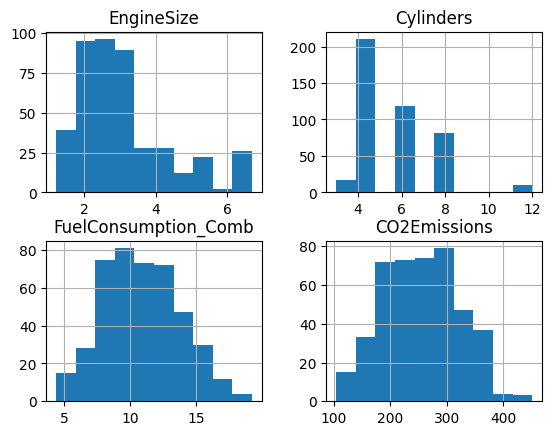

In [9]:
viz = cdf[['EngineSize','Cylinders', 'FuelConsumption_Comb', 'CO2Emissions']]
viz.hist()
plt.show()

**Insights**
- Most cars have 4,6,8 cylinders
- Engine sizes are between 2 and 4 

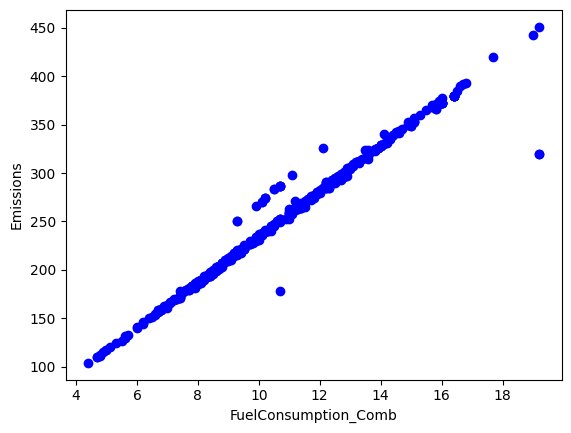

In [10]:
plt.scatter(cdf.FuelConsumption_Comb, cdf.CO2Emissions,  color='blue')
plt.xlabel("FuelConsumption_Comb")
plt.ylabel("Emissions")
plt.show()

**Insights**
- One car group has a strong linear relationship between it's combined fuel consumption and CO2 emissions. 
- Another group has a linear relation but it is weak.

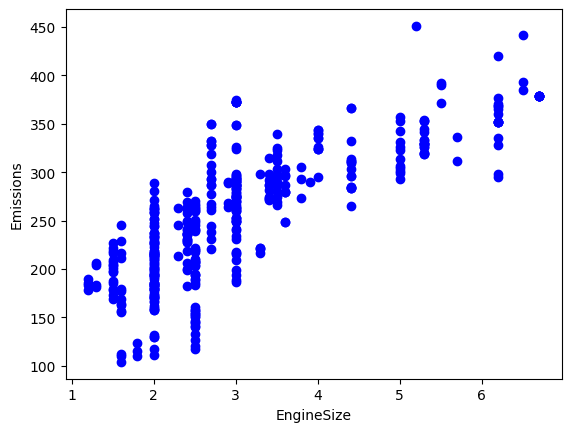

In [11]:
plt.scatter(cdf.EngineSize, cdf.CO2Emissions,  color='blue')
plt.xlabel("EngineSize")
plt.ylabel("Emissions")
plt.show()

**Insights**

**Positive Correlation**
- As engine size increases, CO₂ emissions also increase.
- Upward trend from left (small engines) to right (large engines).

 **Smaller Engines - Lower Emissions**
- Vehicles with 1.5L–2.5L engines mostly emit between 100–250 g/km.
- These are usually compact cars or efficient models.

**Data Spread Shows Some Variation**
- Even within the same engine size:
- Emissions vary slightly depending on vehicle design, fuel type


## Extract the input features and labels from the dataset
- Let us pick engine size 
- Extract the input feature and targer / output variables.

In [15]:
#For EngineSize
X = cdf.EngineSize.to_numpy()
y = cdf.CO2Emissions.to_numpy()


## Create, Train and Test Datasets

**Steps**
- Split the dataset into two parts: training set and testing set.
- Train a SLM using the training set.
- Use the trained model to make predictions on the unseen testing set.
- The test data already has the real answers.
- After training the model, use the test data to check its predictions.
- Compare the predicted values with the actual values.
- This tells how well the model performs on new, unseen data.
- This measurement is called **out-of-sample accuracy.**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (349,), (349,))

## Build a Simple Linear Regression Model

In [19]:
#Using scikit-learn
from sklearn import linear_model

#create a model
regress = linear_model.LinearRegression()

#train the model on training data
regress.fit(X_train.reshape(-1,1), y_train)

#print the coefficients
print('Coefficients:', regress.coef_[0])
print('Intercept:', regress.intercept_)

Coefficients: 39.886630889809524
Intercept: 134.94676409410977


**Coefficient and Intercept:** They define the slope and best fit line to the training data 

## Visualize Model Outputs
Plot Goodness-of-fit of the model to the training data.

The regression model is the line given by y = intercept + coefficient* x.

Text(0, 0.5, 'Emissions')

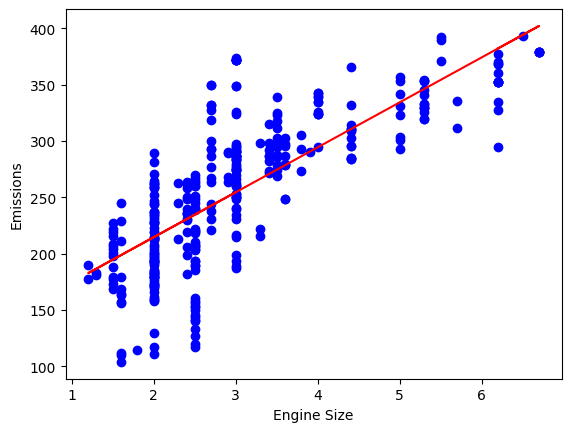

In [20]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regress.coef_ *X_train + regress.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")

## Model Evaluation
Compare the actual values and predicted values to calculate the accuracy of the regression model.

- **Mean Absolute Error (MAE):** Average of the absolute differences between actual and predicted values.
- **Mean Squared Error (MSE):** Average of squared differences between actual and predicted values; measures model error.  
- **Root Mean Squared Error (RMSE):** Square root of MSE; in the same units as the data, easier to interpret.  
- **R-squared (R²):** Measures how well the model fits the data; closer to 1 means better fit.


In [24]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

 #Use the predict method to make test prediction
y_test_ = regress.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
 print("R2-score: %.2f" % r2_score(y_test_, y_test))

Mean absolute error: 30.08
Mean squared error: 1583.53
Root mean squared error: 39.79
R2-score: 0.53


- **Mean Absolute Error (MAE = 30.08):** On average, the model’s predicted CO₂ emissions are about 30 g/km off from the actual values.
- **Mean Squared Error (MSE = 1583.53):** Average of squared errors (g/km)²; larger mistakes contribute more, highlighting big prediction errors.  
- **Root Mean Squared Error (RMSE = 39.79):** Square root of MSE; gives average deviation in original units, so predictions are about39.79 g/km off on average.  
- **R²-score (0.53):** The model explains 53% of the variance in CO₂ emissions, indicating a moderate fit.  




**Summary:** The model moderately fits the CO₂ emissions data, capturing some patterns but with typical prediction errors around 40 g/km. Large deviations have a bigger impact due to squaring in MSE.